# kaggle및 구글드라이브에서 데이터셋 불러오기

In [1]:
# train/test파일 읽기
import pandas as pd

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [2]:
# csv 파일 읽기
train_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,5b9fc53d-960a-475a-b189-b54d9c7564a6,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,44c431b4-0f1a-4403-b701-98ab0f23f260,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,5bdfbdcf-ab7b-41da-b1d5-51f819eb66dc,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,a6439c47-77e6-4c51-b834-0f66b0f1a239,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,9ab55bb5-1957-46a6-8472-d26b2fda624a,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0


# 머신러닝 분석에 필요없는 컬럼제거
- customer_id

In [3]:
# 필요없는 컬럼제거: customer_id
train_df = train_df.drop(columns=['customer_id'], axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,64,Male,Premium,2.66,57,North America,Desktop,17.99,Credit Card,2,0.05,Romance,1
3496,20,Male,Basic,16.96,53,North America,Tablet,8.99,Gift Card,1,0.31,Action,1
3497,32,Female,Standard,52.67,34,Asia,Laptop,13.99,Gift Card,3,1.50,Sci-Fi,0
3498,67,Other,Standard,10.24,11,South America,Desktop,13.99,Debit Card,2,0.85,Romance,0


# 머신러닝을 위한 target과 feature 나누기
- 고객 이탈(churned)을 예측하기 위함
- target: churned, features: 나머지 12개 columns

In [4]:
# target과 나머지 features로 분류
target = train_df['churned']
features = train_df.drop(columns=['churned'], axis=1)
features.shape

(3500, 12)

In [5]:
target.shape

(3500,)

# target의 0과 1개수 파악하기

In [6]:
# target 데이터의 0과 1의 개수 파악
target.value_counts()

churned
1    1761
0    1739
Name: count, dtype: int64

- churned데이터의 개수가 2500개와 큰 차이가 없음
- 별도의 데이터 축소 작업은 하지 않음

# train_test_split 진행
- 앞으로의 random_state는 42로 설정
- 성능에 따라 test_size는 조정가능

In [7]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 12), (700, 12), (2800,), (700,))

# train과 test데이터에 대한 결측치 확인

In [8]:
# X_train 정보확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 162 to 3174
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2800 non-null   int64  
 1   gender                  2800 non-null   object 
 2   subscription_type       2800 non-null   object 
 3   watch_hours             2800 non-null   float64
 4   last_login_days         2800 non-null   int64  
 5   region                  2800 non-null   object 
 6   device                  2800 non-null   object 
 7   monthly_fee             2800 non-null   float64
 8   payment_method          2800 non-null   object 
 9   number_of_profiles      2800 non-null   int64  
 10  avg_watch_time_per_day  2800 non-null   float64
 11  favorite_genre          2800 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 284.4+ KB


In [9]:
# X_test 정보확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 1650 to 2213
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     700 non-null    int64  
 1   gender                  700 non-null    object 
 2   subscription_type       700 non-null    object 
 3   watch_hours             700 non-null    float64
 4   last_login_days         700 non-null    int64  
 5   region                  700 non-null    object 
 6   device                  700 non-null    object 
 7   monthly_fee             700 non-null    float64
 8   payment_method          700 non-null    object 
 9   number_of_profiles      700 non-null    int64  
 10  avg_watch_time_per_day  700 non-null    float64
 11  favorite_genre          700 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 71.1+ KB


# train, test 데이터셋 분석 결과
- train, test 모두 결측치(null)없음
- 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

# 각 column별 이탈(churned)과의 상관관계 분석

## 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day

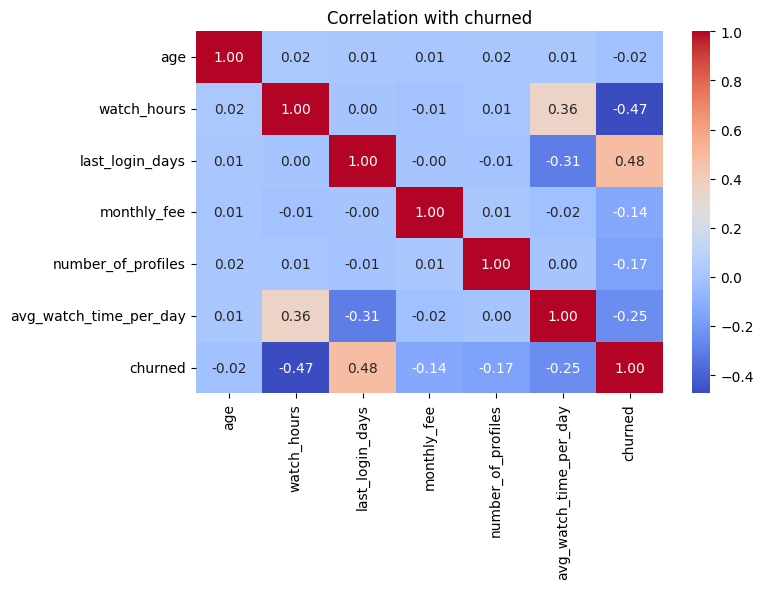

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.concat([X_train, y_train], axis=1)
# 수치형 데이터에 대한 heatmap 상관관계 분석
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
corr = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with churned')
try:
    plt.tight_layout()
    plt.savefig("./images/feature-correlation")
    plt.show()
except:
    import os
    os.mkdir("./images")
    plt.tight_layout()
    plt.savefig("./images/feature-correlation")
    plt.show()

# 상관관계 분석결과
- age는 상관관계가 거의 없으므로 featuring 대상에서 제외
- watch_hours와 last_login_days의 상관관계가 높음
- watch_hours와 last_login_days를 중심으로 age을 제외한 feature에 대해서 featuring 진행

# 문자열(카테고리) 분석
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

## gender

In [11]:
# gender
train_data['gender'].value_counts()

gender
Female    956
Male      929
Other     915
Name: count, dtype: int64

In [12]:
# gender와 churned간에 상관관계
train_data.groupby('gender')['churned'].value_counts(sort=False)

gender  churned
Female  0          475
        1          481
Male    0          460
        1          469
Other   0          446
        1          469
Name: count, dtype: int64

In [13]:
# 비율
train_data.groupby('gender')['churned'].value_counts(normalize=True, sort=False)

gender  churned
Female  0          0.496862
        1          0.503138
Male    0          0.495156
        1          0.504844
Other   0          0.487432
        1          0.512568
Name: proportion, dtype: float64

<Axes: xlabel='gender,churned'>

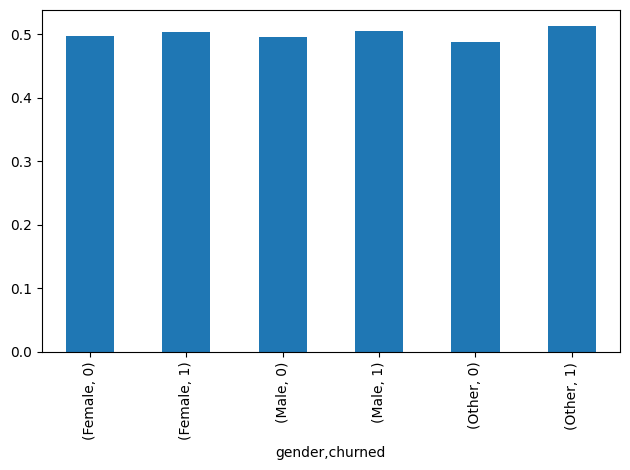

In [14]:
# 비율에 대한 barplot
gender_churned = train_data.groupby('gender')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/gender_churned")
gender_churned

- Male과 Other는 사실상 churned 차이가 없음
- Female도 유의미한 차이 없음
- gender에 대해서는 featuring 안하는 것이 바람직하다고 판단됨
- 굳이 featuring하자면 Female 여부로 나누는 것이 최선임

## subscription_type

In [15]:
# subscription_type
train_data['subscription_type'].value_counts()

subscription_type
Premium     955
Basic       944
Standard    901
Name: count, dtype: int64

In [16]:
# churned 간의 상관관계
train_data.groupby('subscription_type')['churned'].value_counts(sort=False)

subscription_type  churned
Basic              0          367
                   1          577
Premium            0          529
                   1          426
Standard           0          485
                   1          416
Name: count, dtype: int64

In [17]:
# 비율
train_data.groupby('subscription_type')['churned'].value_counts(normalize=True, sort=False)

subscription_type  churned
Basic              0          0.388771
                   1          0.611229
Premium            0          0.553927
                   1          0.446073
Standard           0          0.538291
                   1          0.461709
Name: proportion, dtype: float64

<Axes: xlabel='subscription_type,churned'>

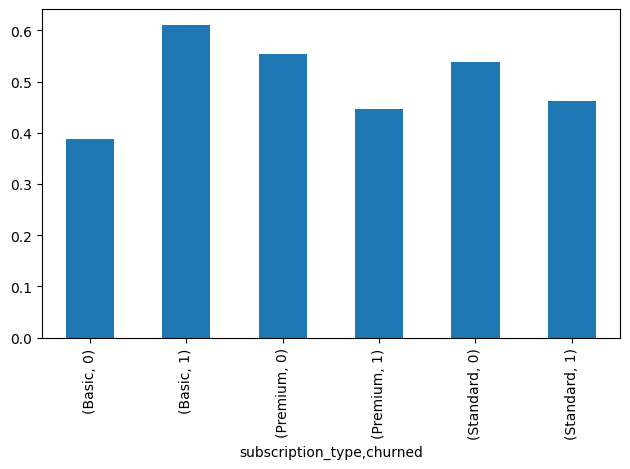

In [35]:
# barplot
subscription_churned = train_data.groupby('subscription_type')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/subscription_churned")
subscription_churned

- Basic일수록 이탈확률(churned:1)이 큼
- Basic이 아니면, 이탈하지 않을 가능성이 높음
- Basic여부에 대한 featuring이 권장됨

## region

In [19]:
# region
train_data['region'].value_counts()

region
South America    496
Asia             485
North America    479
Europe           478
Africa           440
Oceania          422
Name: count, dtype: int64

In [20]:
# churned 간의 상관관계
train_data.groupby('region')['churned'].value_counts(sort=False)

region         churned
Africa         0          227
               1          213
Asia           0          231
               1          254
Europe         0          220
               1          258
North America  0          250
               1          229
Oceania        0          208
               1          214
South America  0          245
               1          251
Name: count, dtype: int64

In [21]:
# 비율
train_data.groupby('region')['churned'].value_counts(normalize=True, sort=False)

region         churned
Africa         0          0.515909
               1          0.484091
Asia           0          0.476289
               1          0.523711
Europe         0          0.460251
               1          0.539749
North America  0          0.521921
               1          0.478079
Oceania        0          0.492891
               1          0.507109
South America  0          0.493952
               1          0.506048
Name: proportion, dtype: float64

<Axes: xlabel='region,churned'>

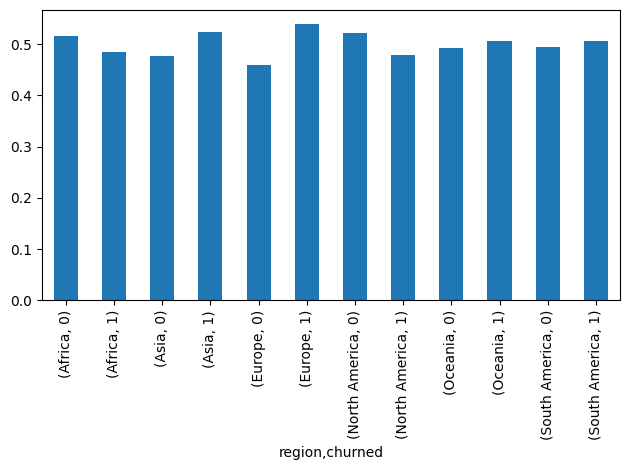

In [36]:
# bar plot
region_churned = train_data.groupby('region')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/region_churned")
region_churned

- Africa의 이탈률이 상대적으로 적음
- 이외 지역에서는 비슷하거나, 이탈률이 약간 많음
- 모든 카테고리에 대한 상관관계가 낮음
- 굳이 featuring을 한다면 Africa의 여부에 대한 featuring 진행

## device

In [23]:
# device
train_data['device'].value_counts()

device
Tablet     609
Mobile     589
Laptop     554
TV         546
Desktop    502
Name: count, dtype: int64

In [24]:
# churned 간의 상관관계
train_data.groupby('device')['churned'].value_counts(sort=False)

device   churned
Desktop  0          254
         1          248
Laptop   0          256
         1          298
Mobile   0          289
         1          300
TV       0          270
         1          276
Tablet   0          312
         1          297
Name: count, dtype: int64

In [25]:
# 비율
train_data.groupby('device')['churned'].value_counts(normalize=True, sort=False)

device   churned
Desktop  0          0.505976
         1          0.494024
Laptop   0          0.462094
         1          0.537906
Mobile   0          0.490662
         1          0.509338
TV       0          0.494505
         1          0.505495
Tablet   0          0.512315
         1          0.487685
Name: proportion, dtype: float64

<Axes: xlabel='device,churned'>

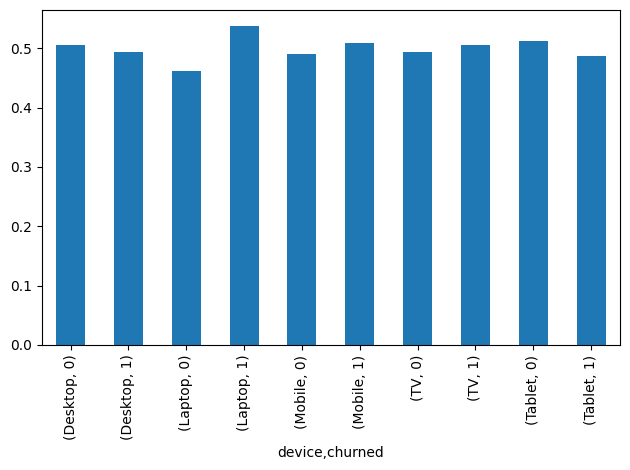

In [37]:
# barplot
device_churned = train_data.groupby('device')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/device_churned")
device_churned

- 모든 value에 대한 상관관계가 낮거나 없음
- 5가지의 value를 모두 반영해서 encoding하는 방식으로 활용가능

##  payment_method

In [27]:
# payment_method
train_data['payment_method'].value_counts()

payment_method
PayPal         585
Gift Card      562
Debit Card     552
Credit Card    551
Crypto         550
Name: count, dtype: int64

In [28]:
# churned 간의 상관관계
train_data.groupby('payment_method')['churned'].value_counts(sort=False)

payment_method  churned
Credit Card     0          308
                1          243
Crypto          0          224
                1          326
Debit Card      0          310
                1          242
Gift Card       0          235
                1          327
PayPal          0          304
                1          281
Name: count, dtype: int64

In [29]:
# 비율
train_data.groupby('payment_method')['churned'].value_counts(normalize=True, sort=False)

payment_method  churned
Credit Card     0          0.558984
                1          0.441016
Crypto          0          0.407273
                1          0.592727
Debit Card      0          0.561594
                1          0.438406
Gift Card       0          0.418149
                1          0.581851
PayPal          0          0.519658
                1          0.480342
Name: proportion, dtype: float64

<Axes: xlabel='payment_method,churned'>

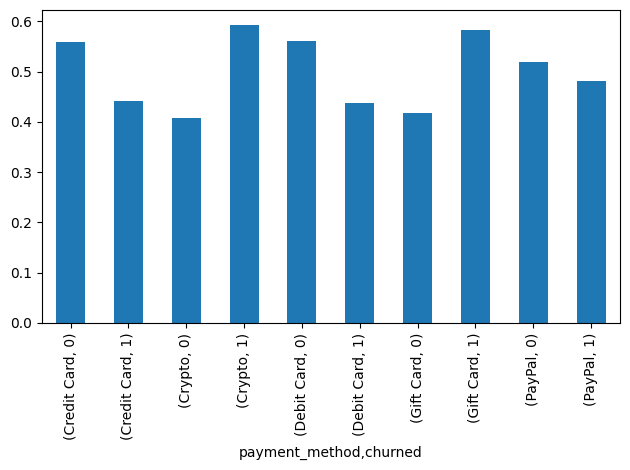

In [38]:
# bar plot
payment_churned = train_data.groupby('payment_method')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/payment_churned")
payment_churned

- 이탈(churned) 유력: Crypto, Gift Card
- 잔류(not churned) 유력: Credit Card, Debit Card, Paypal

## favorite_genre

In [31]:
# favorite_genre
train_data['favorite_genre'].value_counts()

favorite_genre
Drama          422
Comedy         413
Sci-Fi         403
Romance        401
Horror         401
Action         386
Documentary    374
Name: count, dtype: int64

In [32]:
# chruned
train_data.groupby('favorite_genre')['churned'].value_counts(sort=False)

favorite_genre  churned
Action          0          179
                1          207
Comedy          0          215
                1          198
Documentary     0          183
                1          191
Drama           0          206
                1          216
Horror          0          184
                1          217
Romance         0          208
                1          193
Sci-Fi          0          206
                1          197
Name: count, dtype: int64

In [33]:
# 비율
train_data.groupby('favorite_genre')['churned'].value_counts(normalize=True, sort=False)

favorite_genre  churned
Action          0          0.463731
                1          0.536269
Comedy          0          0.520581
                1          0.479419
Documentary     0          0.489305
                1          0.510695
Drama           0          0.488152
                1          0.511848
Horror          0          0.458853
                1          0.541147
Romance         0          0.518703
                1          0.481297
Sci-Fi          0          0.511166
                1          0.488834
Name: proportion, dtype: float64

<Axes: xlabel='gender,churned'>

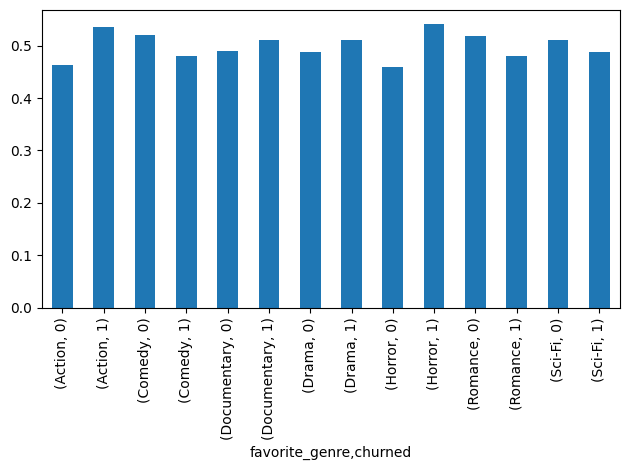

In [39]:
# bar plot
genre_churned = train_data.groupby('favorite_genre')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.tight_layout()
plt.savefig("./images/genre_churned")
gender_churned

- 이탈 확률이 높음: Drama, Action
- 이탈 확률이 낮음: Sci-Fi, Romance, Comedy
- 상관관계 없음: Documentary, Horror
- 각 value를 위의 3가지 category로 나눠서 featuring 고려 가능